# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


589

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities_weather = pd.DataFrame(cities, columns=["City"])
cities_weather["Cloudiness"] = ""
cities_weather["Country"] = ""
cities_weather["Date"] = ""
cities_weather["Humidity"] = ""
cities_weather["Lat"] = ""
cities_weather["Lng"] = ""
cities_weather["Max Temp"] = ""
cities_weather["Wind Speed"] = ""
cities_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hilo,,,,,,,,
1,roma,,,,,,,,
2,taolanaro,,,,,,,,
3,new norfolk,,,,,,,,
4,ushuaia,,,,,,,,


In [4]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
params = {
    "APPID": api_key,
    "units": "imperial"
}

for index, row in cities_weather.iterrows():
    city_name = row["City"]
    params["q"] = city_name
    
    response = requests.get(url, params=params).json()

    try:
        print(f"Processing Reocrd {index}| {city_name}.")
        
        cities_weather.loc[index, "Cloudiness"] = response["clouds"]["all"]
        cities_weather.loc[index, "Country"] = response["sys"]["country"]
        cities_weather.loc[index, "Date"] = response["dt"]
        cities_weather.loc[index, "Humidity"] = response["main"]["humidity"]
        cities_weather.loc[index, "Lat"] = response["coord"]["lat"]
        cities_weather.loc[index, "Lng"] = response["coord"]["lon"]
        cities_weather.loc[index, "Max Temp"] = response["main"]["temp_max"]
        cities_weather.loc[index, "Wind Speed"] = response["wind"]["speed"]

    except (KeyError, IndexError):
        print("City not found ... skipping.")
        
    print("------------")

Processing Reocrd 0| hilo.
------------
Processing Reocrd 1| roma.
------------
Processing Reocrd 2| taolanaro.
City not found ... skipping.
------------
Processing Reocrd 3| new norfolk.
------------
Processing Reocrd 4| ushuaia.
------------
Processing Reocrd 5| port hardy.
------------
Processing Reocrd 6| bluff.
------------
Processing Reocrd 7| kuytun.
------------
Processing Reocrd 8| bilma.
------------
Processing Reocrd 9| butaritari.
------------
Processing Reocrd 10| acari.
------------
Processing Reocrd 11| zhuanghe.
------------
Processing Reocrd 12| ambilobe.
------------
Processing Reocrd 13| kota kinabalu.
------------
Processing Reocrd 14| punta arenas.
------------
Processing Reocrd 15| hobart.
------------
Processing Reocrd 16| kamina.
------------
Processing Reocrd 17| keflavik.
------------
Processing Reocrd 18| port alfred.
------------
Processing Reocrd 19| tsihombe.
City not found ... skipping.
------------
Processing Reocrd 20| lebu.
------------
Processing Reoc

Processing Reocrd 169| kingsville.
------------
Processing Reocrd 170| vedaranniyam.
City not found ... skipping.
------------
Processing Reocrd 171| shimoda.
------------
Processing Reocrd 172| mashhad.
------------
Processing Reocrd 173| mahebourg.
------------
Processing Reocrd 174| calabasas.
------------
Processing Reocrd 175| kismayo.
City not found ... skipping.
------------
Processing Reocrd 176| katsuura.
------------
Processing Reocrd 177| tiksi.
------------
Processing Reocrd 178| abu dhabi.
------------
Processing Reocrd 179| barentsburg.
City not found ... skipping.
------------
Processing Reocrd 180| saint george.
------------
Processing Reocrd 181| meulaboh.
------------
Processing Reocrd 182| paamiut.
------------
Processing Reocrd 183| grand gaube.
------------
Processing Reocrd 184| ayan.
------------
Processing Reocrd 185| mosquera.
------------
Processing Reocrd 186| anchorage.
------------
Processing Reocrd 187| ambulu.
------------
Processing Reocrd 188| orumiyeh.

Processing Reocrd 332| chunian.
------------
Processing Reocrd 333| rundu.
------------
Processing Reocrd 334| nome.
------------
Processing Reocrd 335| dunedin.
------------
Processing Reocrd 336| marapanim.
------------
Processing Reocrd 337| strezhevoy.
------------
Processing Reocrd 338| santa isabel do rio negro.
------------
Processing Reocrd 339| nosy varika.
------------
Processing Reocrd 340| barao de melgaco.
------------
Processing Reocrd 341| hvide sande.
------------
Processing Reocrd 342| dingle.
------------
Processing Reocrd 343| singaraja.
------------
Processing Reocrd 344| obihiro.
------------
Processing Reocrd 345| asyut.
------------
Processing Reocrd 346| bonthe.
------------
Processing Reocrd 347| igarka.
------------
Processing Reocrd 348| bengkulu.
City not found ... skipping.
------------
Processing Reocrd 349| akhmim.
------------
Processing Reocrd 350| constitucion.
------------
Processing Reocrd 351| pinawa.
------------
Processing Reocrd 352| bambous viri

Processing Reocrd 504| kalmunai.
------------
Processing Reocrd 505| albuquerque.
------------
Processing Reocrd 506| odienne.
------------
Processing Reocrd 507| dong hoi.
------------
Processing Reocrd 508| westport.
------------
Processing Reocrd 509| nalut.
------------
Processing Reocrd 510| winslow.
------------
Processing Reocrd 511| kirakira.
------------
Processing Reocrd 512| pahrump.
------------
Processing Reocrd 513| zavolzhye.
------------
Processing Reocrd 514| omsukchan.
------------
Processing Reocrd 515| bathurst.
------------
Processing Reocrd 516| selenduma.
------------
Processing Reocrd 517| mao.
------------
Processing Reocrd 518| mangrol.
------------
Processing Reocrd 519| kidal.
------------
Processing Reocrd 520| langarud.
------------
Processing Reocrd 521| nerchinskiy zavod.
------------
Processing Reocrd 522| osakarovka.
------------
Processing Reocrd 523| luwuk.
------------
Processing Reocrd 524| banmo.
City not found ... skipping.
------------
Processin

In [5]:
cities_weather.replace('', np.nan, inplace=True)
cities_clean = cities_weather.dropna(how="any")
cities_clean.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hilo,75.0,US,1.540332e+09,74.0,19.71,-155.08,82.4,5.82
1,roma,0.0,IT,1.540335e+09,76.0,41.89,12.48,59.0,4.70
3,new norfolk,20.0,AU,1.540336e+09,46.0,-42.78,147.06,53.6,6.93
4,ushuaia,40.0,AR,1.540332e+09,70.0,-54.81,-68.31,44.6,21.92
5,port hardy,90.0,CA,1.540336e+09,93.0,50.70,-127.42,51.8,3.36


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
cities_clean.to_csv("Cities Weather Information.csv")
cities_clean.count()

City          535
Cloudiness    535
Country       535
Date          535
Humidity      535
Lat           535
Lng           535
Max Temp      535
Wind Speed    535
dtype: int64

In [13]:
cities_clean.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hilo,75.0,US,1.540332e+09,74.0,19.71,-155.08,82.4,5.82
1,roma,0.0,IT,1.540335e+09,76.0,41.89,12.48,59.0,4.70
3,new norfolk,20.0,AU,1.540336e+09,46.0,-42.78,147.06,53.6,6.93
4,ushuaia,40.0,AR,1.540332e+09,70.0,-54.81,-68.31,44.6,21.92
5,port hardy,90.0,CA,1.540336e+09,93.0,50.70,-127.42,51.8,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

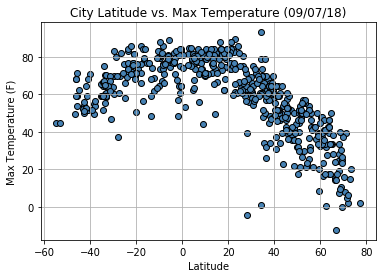

In [15]:
city_lat = cities_clean["Lat"]
city_temp = cities_clean["Max Temp"]

plt.scatter(city_lat,city_temp, marker='o',facecolor="steelblue",edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (09/07/18)")
plt.grid()
plt.savefig("City Latitude vs. Max Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

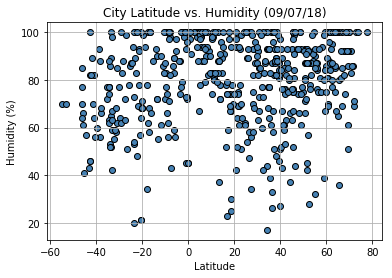

In [16]:
city_lat = cities_clean["Lat"]
city_temp = cities_clean["Humidity"]

plt.scatter(city_lat,city_temp, marker='o',facecolor="steelblue",edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (09/07/18)")
plt.grid()
plt.savefig("City Latitude vs. Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

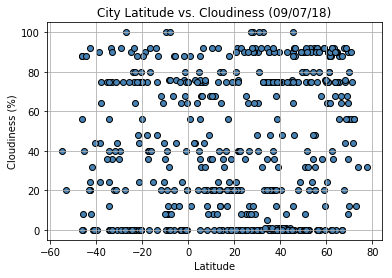

In [17]:
city_lat = cities_clean["Lat"]
city_temp = cities_clean["Cloudiness"]

plt.scatter(city_lat,city_temp, marker='o',facecolor="steelblue",edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (09/07/18)")
plt.grid()
plt.savefig("City Latitude vs. Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

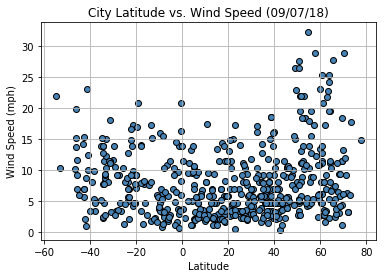

In [18]:
city_lat = cities_clean["Lat"]
city_temp = cities_clean["Wind Speed"]

plt.scatter(city_lat,city_temp, marker='o',facecolor="steelblue",edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (09/07/18)")
plt.grid()
plt.savefig("City Latitude vs. Wind Speed.png")
plt.show()